In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [ ]:
### open the image
img = cv2.imread('./7.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


### turn the image into binary values
_, threshold = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
threshold = cv2.bitwise_not(threshold)
img_original = threshold


### apply a morphologival transformation - DILATION
structuring_element = np.ones((5, 5), np.int8)
dilate = cv2.dilate(threshold, structuring_element, iterations=4)


### apply a morphologival transformation - EROSION
structuring_element = np.ones((5, 5), np.uint8)
erosion = cv2.erode(threshold, structuring_element, iterations=4)


### plot the image and its transformations
fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].imshow(threshold, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original')

axs[1].imshow(dilate, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Dilate')

axs[2].imshow(erosion, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Erosion')

plt.show()


In [ ]:
img = np.array([[0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0],
                [0, 1, 1, 0, 0],
                [0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0]], dtype=np.uint8)

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
dilate = cv2.dilate(img, kernel, iterations=1)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(img)
axs[1].imshow(dilate)

In [ ]:
img_red = cv2.imread('7reduzido.png')

img_red = cv2.cvtColor(img_red, cv2.COLOR_BGR2GRAY)

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])
_, threshold = cv2.threshold(img_red, 30, 255, cv2.THRESH_BINARY)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img_original)
axs[0].axis('off')
axs[0].set_title('Original Threshold')

axs[1].imshow(img_red)
axs[1].axis('off')
axs[1].set_title('Resized')

axs[2].imshow(threshold)
axs[2].axis('off')
axs[2].set_title('Resized and Threshold')

In [ ]:
img = cv2.imread('7.jpg')

img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

img_conv = cv2.filter2D(img, -1, kernel)
_, threshold = cv2.threshold(img_conv, 120, 255, cv2.THRESH_BINARY)

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
dilate = cv2.dilate(threshold, kernel, iterations=5)

plt.imshow(dilate , cmap='gray')

In [ ]:
img = cv2.imread('7.jpg')



kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])

img_conv = cv2.filter2D(img, -1, kernel)

plt.imshow(img_conv, cmap='gray')

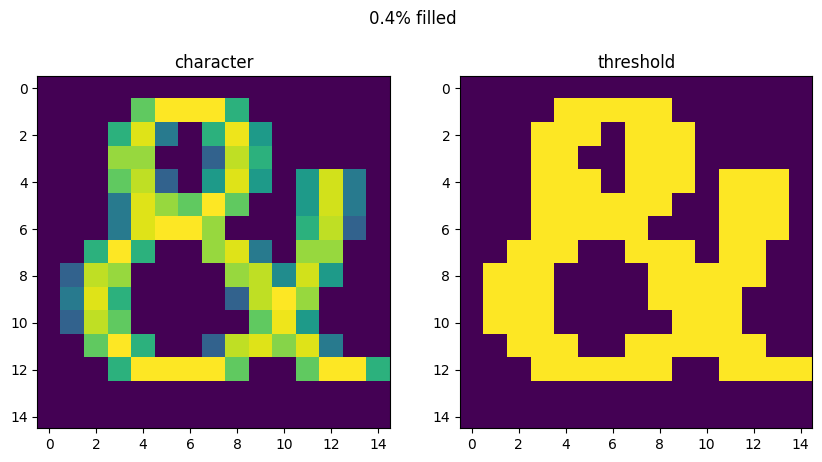

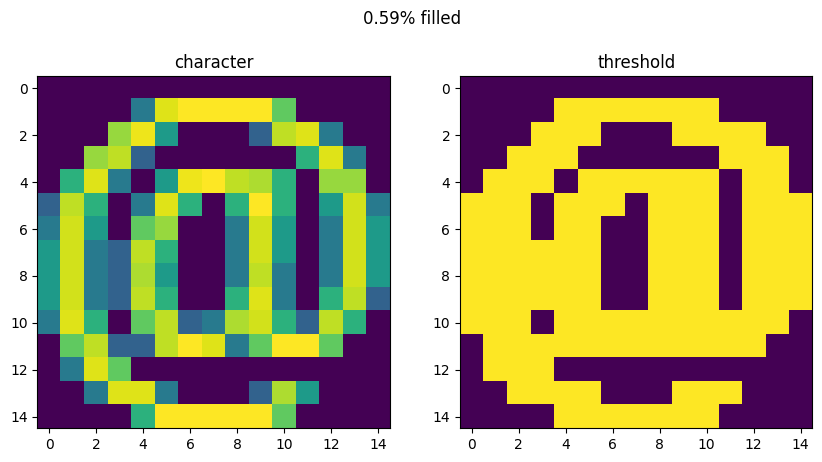

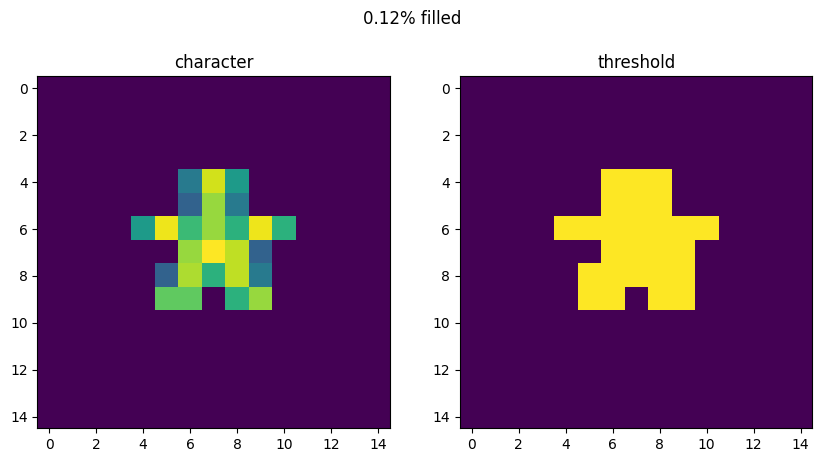

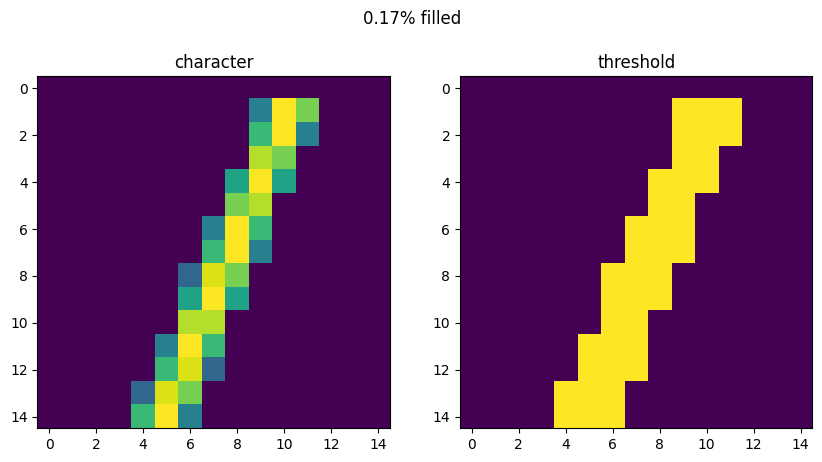

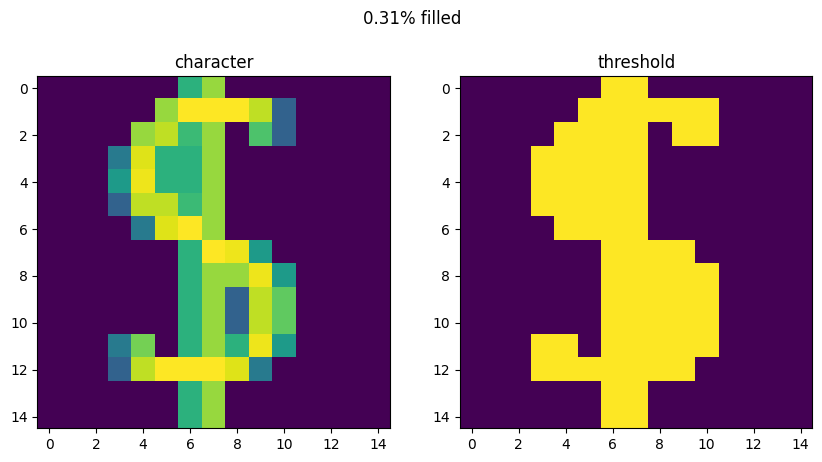

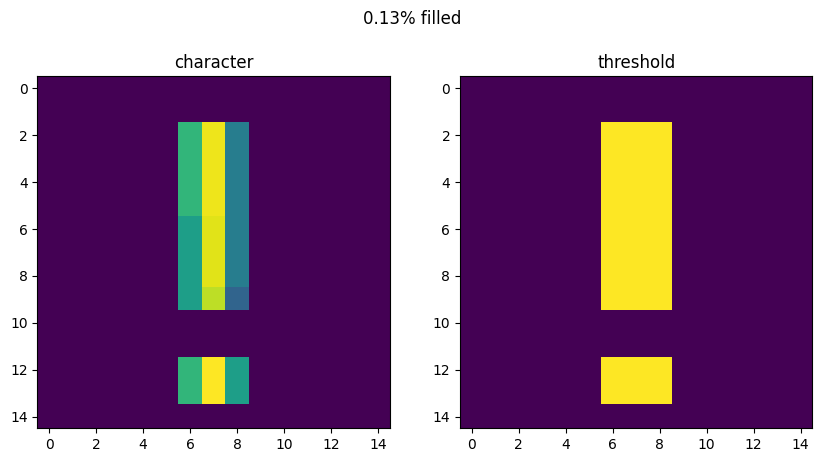

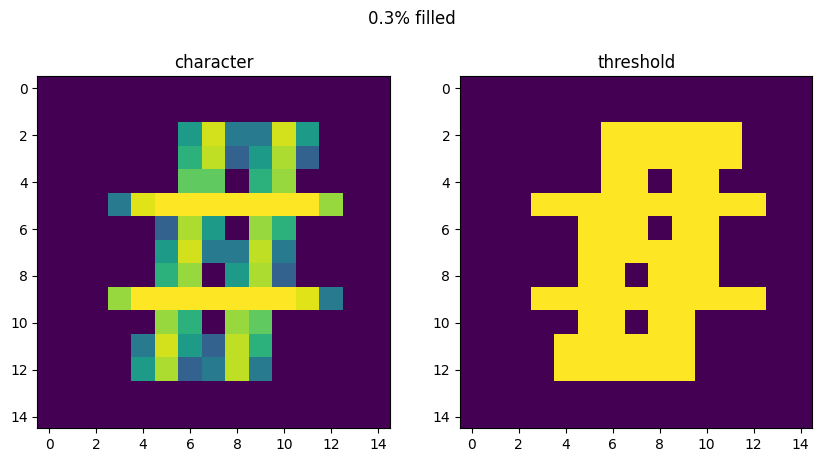

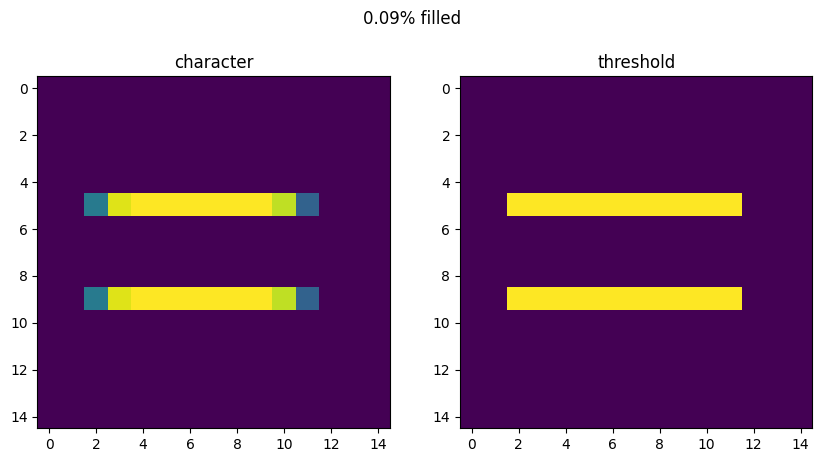

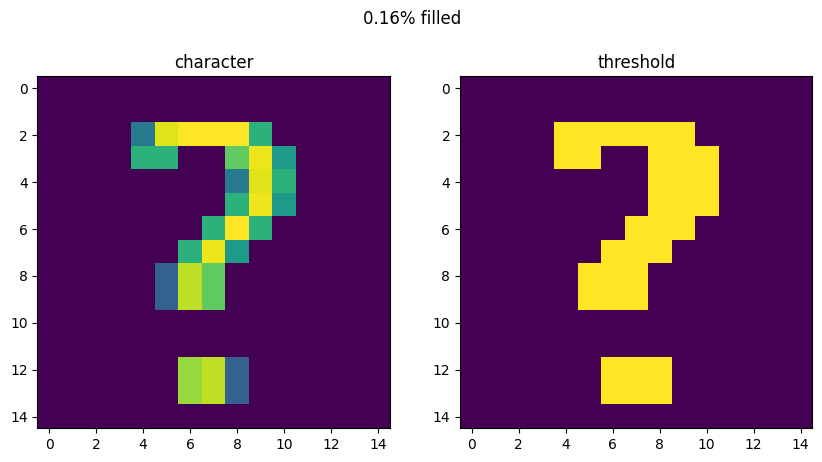

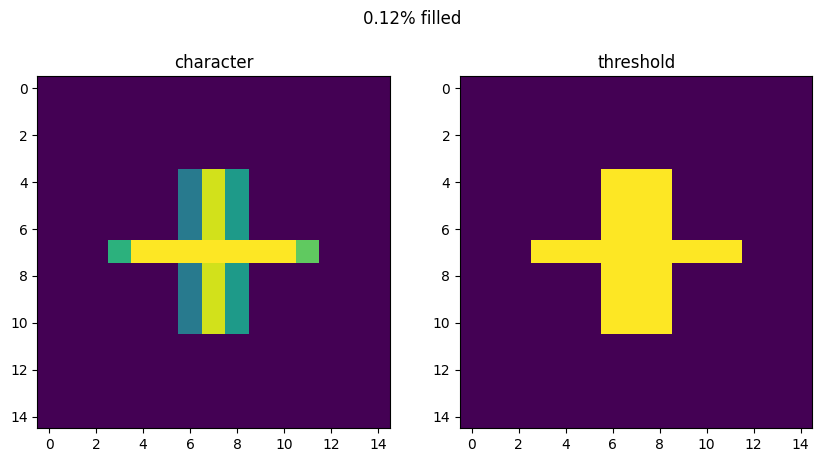

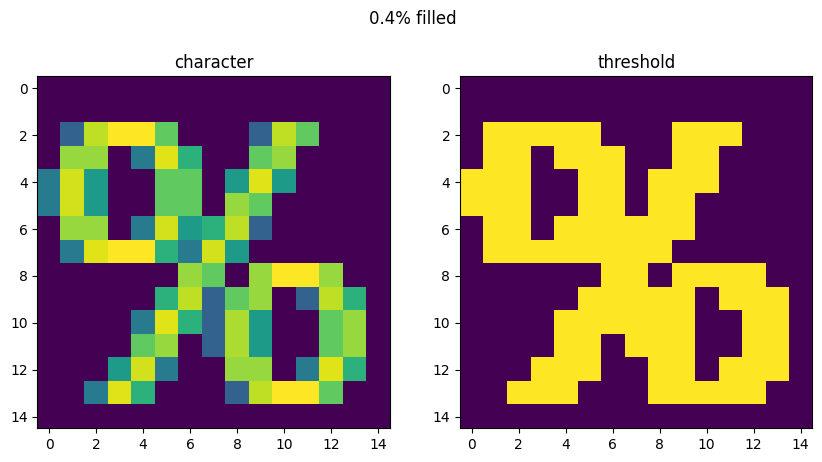

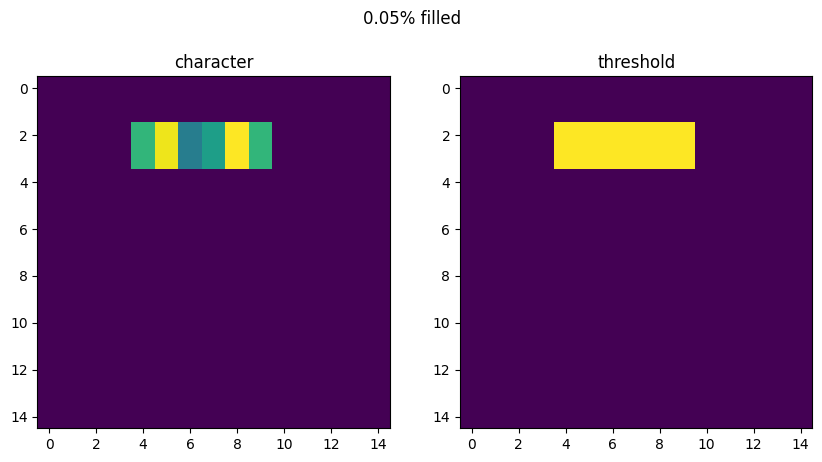

In [63]:
path = 'data/caracteres/'
chars = os.listdir(path)
chars = list(map(lambda file: path + file, chars))
non_zeros = {}

for i, file in enumerate(chars):
    img = cv2.imread(file)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = np.where(img == 19, 0, img)

    kernel = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]])
    _, threshold = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)

    non_zero = np.count_nonzero(threshold != 0)
    non_zeros.update({file.split('/')[-1].split('.')[0]: non_zero})

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'{round(non_zero/225, 2)}% filled')
    axs[0].imshow(img)
    axs[0].set_title('character')

    axs[1].imshow(threshold)
    axs[1].set_title('threshold')
    plt.show()

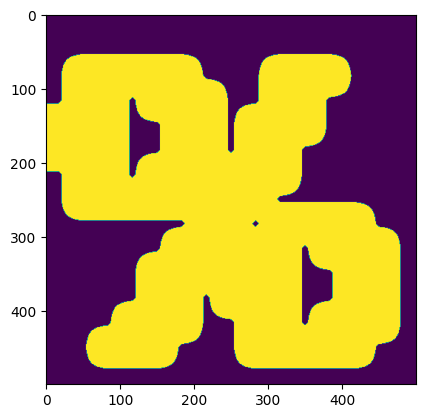

In [94]:
img = cv2.imread(chars[10])

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = np.where(img == 19, 0, img)

kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]])
_, threshold = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)

# MUDAR O TAMANHO E VER RESULTADOS
threshold = cv2.resize(threshold, (500, 500))
_, threshold = cv2.threshold(threshold, 30, 255, cv2.THRESH_BINARY)

plt.imshow(threshold)
plt.show()

In [ ]:
img = cv2.imread(file)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = np.where(img == 19, 0, img)

kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]])
_, threshold = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)

non_zero = np.count_nonzero(threshold != 0)
non_zeros.append(non_zero)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f'{round(non_zero/225, 2)}% filled')
axs[0].imshow(img)
axs[0].set_title('character')

axs[1].imshow(threshold)
axs[1].set_title('threshold')
plt.show()



In [52]:
path = 'data/caracteres/'
chars = os.listdir(path)
chars = list(map(lambda file: path + file, chars))

chars = list(map(lambda file: file.split('/')[-1].split('.')[0], chars))
chars

['and',
 'arroba',
 'asterisco',
 'barra',
 'cifrao',
 'exclamacao',
 'hash',
 'igual',
 'interrocacao',
 'mais',
 'porcentagem',
 'trema']

In [65]:
non_zeros


{'and': 90,
 'arroba': 132,
 'asterisco': 26,
 'barra': 39,
 'cifrao': 70,
 'exclamacao': 30,
 'hash': 68,
 'igual': 20,
 'interrocacao': 35,
 'mais': 27,
 'porcentagem': 91,
 'trema': 12}